<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = ваш балл + котобонус

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Your answer here`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков
- Визуализации признаков и их анализ

Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков**

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [ ]:
df_train.sample(n=10)

In [ ]:
df_test.head()

In [ ]:
df_test.tail()

In [ ]:
df_train.isnull().sum()

In [ ]:
df_test.isnull().sum()

In [ ]:
df_train.duplicated().sum()

In [ ]:
df_test.duplicated().sum()

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [ ]:
median_value_seats = df_train['seats'].median()
df_train['seats'].fillna(median_value_seats, inplace=True)
df_test['seats'].fillna(median_value_seats, inplace=True)

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_train, title="df_train", explorative=True)
profile.to_file("dashboard_df_train.html")

In [ ]:
profile = ProfileReport(df_test, title="df_test", explorative=True)
profile.to_file("dashboard_df_test.html")

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [ ]:
df_without_price = df_train.loc[:, df_train.columns != 'selling_price']
print('кол-во дублей по признакам:', df_without_price.duplicated().sum())
df_without_price.duplicated()

In [ ]:
duplicate_rows = df_without_price[df_without_price.duplicated()]
duplicate_rows

In [ ]:
df_train = df_train.drop_duplicates()

df_without_price = df_train.loc[:, df_train.columns != 'selling_price']
print('кол-во дублей по признакам осталось:', df_without_price.duplicated().sum())
df_without_price = df_without_price.drop_duplicates()
df_without_price

In [ ]:
df_train = pd.merge(df_train['selling_price'], df_without_price, left_index=True, right_index=True)
df_train

In [ ]:
df_train.reset_index(drop=True, inplace=True)
df_train

In [18]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [ ]:
df_train.dtypes

In [ ]:
df_train['mileage'] = df_train['mileage'].str[:-5].astype(float)
df_test['mileage'] = df_test['mileage'].str[:-5].astype(float)
median_value_mil = df_train['mileage'].median()
df_train['mileage'].fillna(median_value_mil, inplace=True)
df_test['mileage'].fillna(median_value_mil, inplace=True)

df_train['engine'] = df_train['engine'].str[:-3].astype(float)
df_test['engine'] = df_test['engine'].str[:-3].astype(float)
median_value_eng = df_train['engine'].median()
df_train['engine'].fillna(median_value_eng, inplace=True)
df_test['engine'].fillna(median_value_eng, inplace=True)

In [21]:
for i in range(0, len(df_train)) :
  try :
    ffil_value = float(df_train.loc[i, 'max_power'][:-4])
    df_train.loc[i, 'max_power'] = ffil_value

  except :
    if df_train.loc[i, 'max_power'] in [np.nan, 'nan'] :
      continue
    elif df_train.loc[i, 'max_power'] == '0' :
      ffil_value = float(df_train.loc[i, 'max_power'])
      df_train.loc[i, 'max_power'] = ffil_value
    else :
      df_train.loc[i, 'max_power'] = 0

for i in range(0, len(df_test)) :
  try :
    ffil_value = float(df_test.loc[i, 'max_power'][:-4])
    df_test.loc[i, 'max_power'] = ffil_value

  except :
    if df_test.loc[i, 'max_power'] in [np.nan, 'nan'] :
      continue
    elif df_test.loc[i, 'max_power'] == '0' :
      ffil_value = float(df_test.loc[i, 'max_power'])
      df_test.loc[i, 'max_power'] = ffil_value
    else :
      df_test.loc[i, 'max_power'] = 0

In [ ]:
df_train['max_power'] = df_train['max_power'].astype(float)
df_test['max_power'] = df_test['max_power'].astype(float)
median_value_mx = df_train['max_power'].median()
df_train['max_power'].fillna(median_value_mx, inplace=True)
df_test['max_power'].fillna(median_value_mx, inplace=True)

In [23]:
df_train = df_train.drop('torque', axis=1)
df_test = df_test.drop('torque', axis=1)

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [24]:
df_train['engine'] = df_train['engine'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

In [ ]:
df_test.dtypes

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [ ]:
df_train.describe()

In [ ]:
df_test.describe()

In [ ]:
df_categorical_columns = ['name', 'fuel', 'seller_type', 'transmission', 'owner']

for i in df_categorical_columns:
    print(df_train[i].value_counts(), '\n')

In [ ]:
for i in df_categorical_columns:
    print(df_test[i].value_counts(), '\n')

In [ ]:
df_train.shape

In [ ]:
assert df_train.shape == (5840, 12)

## **Визуализации**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [40]:
%matplotlib inline

In [ ]:
sns.pairplot(df_train)

In [ ]:
sns.pairplot(df_test)

По графикам можно сказать, что зависимости в train и test близки

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [44]:
df_train.corr(numeric_only=True)

,selling_price,year,km_driven,mileage,engine,max_power,seats
selling_price,1.000000,0.427279,-0.164828,-0.104769,0.447672,0.692725,0.149953
year,0.427279,1.000000,-0.368966,0.341334,0.002819,0.158207,0.041178
km_driven,-0.164828,-0.368966,1.000000,-0.182086,0.229766,0.024379,0.192328
mileage,-0.104769,0.341334,-0.182086,1.000000,-0.572893,-0.372197,-0.451059
engine,0.447672,0.002819,0.229766,-0.572893,1.000000,0.681247,0.652172
max_power,0.692725,0.158207,0.024379,-0.372197,0.681247,1.000000,0.242791
seats,0.149953,0.041178,0.192328,-0.451059,0.652172,0.242791,1.000000


<Axes: >

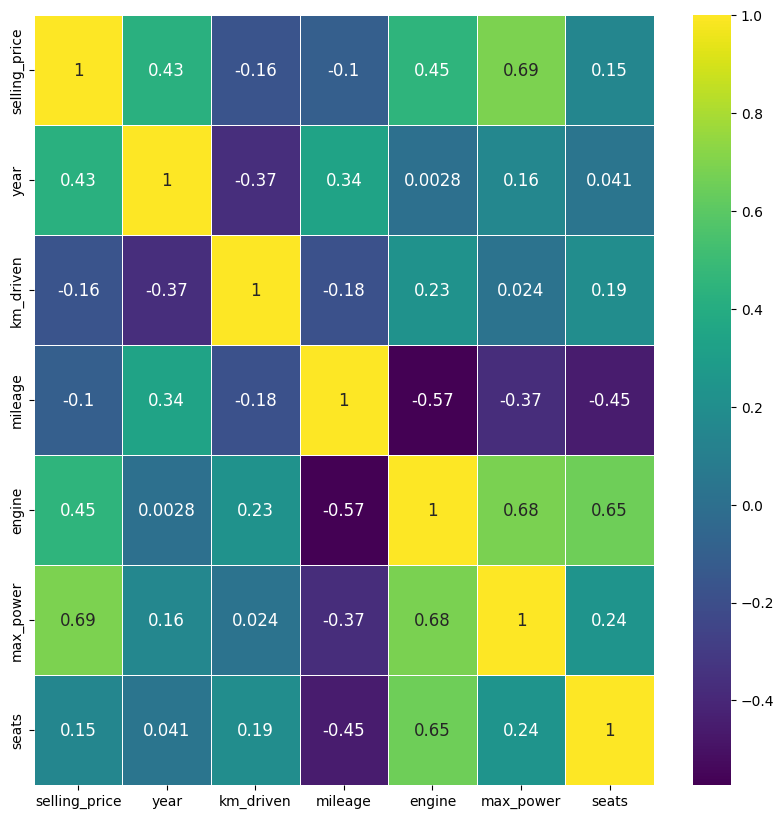

In [45]:
fig , ax = plt.subplots(figsize = (10,10))

sns.heatmap(df_train.corr(numeric_only=True),
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

1) Признаки engine и year имеют минимальную взаимосвязь, так как их коэффициент корреляции близок к нулю
2) Сильная положительная линейная зависимость наблюдается между max_power и selling_price
3) Коэффициент корреляции между year и пробегом составляет -0.37. Это значение указывает на наличие умеренной обратной зависимости (так как значение отрицательное). Следовательно, можно утверждать, что чем старше год выпуска автомобиля, тем больше его пробег к моменту продажи

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.


### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [46]:
categorial_columns = ['name', 'fuel', 'seller_type', 'transmission', 'owner']
df_train_physical = df_train.drop(categorial_columns, axis=1)
df_test_physical = df_test.drop(categorial_columns, axis=1)

y_train = df_train_physical['selling_price'] # train price
X_train = df_train_physical.loc[:, df_train_physical.columns != 'selling_price'] # train other
X_train_copy = df_train_physical.loc[:, df_train_physical.columns != 'selling_price']

y_test = df_test_physical['selling_price'] # test price
X_test = df_test_physical.loc[:, df_test_physical.columns != 'selling_price'] # test other

In [47]:
assert X_train.shape == (5840, 6)

In [48]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
model = LinearRegression()

model.fit(X_train, y_train)
prediction_test = model.predict(X_test)
prediction_train = model.predict(X_train)
print('MSE для теста', MSE(y_test, prediction_test))
print('MSE для train', MSE(y_train, prediction_train))
print('R2 для тест', r2_score(y_test, prediction_test))
print('R2 для треин', r2_score(y_train, prediction_train))

MSE для теста 233551443099.39725
MSE для train 117090306033.01564
R2 для тест 0.5937024338674357
R2 для треин 0.5915050767325452


Ошибка MSE на данных y_test значительно выше, чем на y_train, что вполне ожидаемо, так как модель была обучена на y_train, и её ошибка на этих данных будет меньше. Одним из преимуществ MSE является его высокая чувствительность к крупным отклонениям

Значения R² для обучающей и тестовой выборок отличаются лишь в третьем знаке после запятой. Это свидетельствует о том, что метрика инвариантна к масштабу данных. Значение R², близкое к 1 (в данном случае 0.59 как для трейна, так и для теста), указывает на хорошую степень соответствия модели данным

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train, y_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

model.fit(X_train_sc, y_train)

prediction_test = model.predict(X_test_sc)
prediction_train = model.predict(X_train_sc)

print('MSE для теста', MSE(y_test, prediction_test))
print('MSE для train', MSE(y_train, prediction_train) )
print('R2 для тест', r2_score(y_test, prediction_test))
print('R2 для треин', r2_score(y_train, prediction_train))

MSE для теста 233551443099.39087
MSE для train 117090306033.01596
R2 для тест 0.5937024338674468
R2 для треин 0.591505076732544


Можно заметить, что последние цифры у метрики MSE уменьшились, а у R² увеличились. Это означает, что ошибка модели слегка сократилась, а её качество работы немного улучшилось

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [52]:
pd.DataFrame(data=np.array([model.coef_]), columns=X_train_copy.columns)

,year,km_driven,mileage,engine,max_power,seats
0,152413.794764,-44299.634236,28483.920029,60671.644674,322577.605271,-22512.601794


In [54]:
import pickle

with open('lin_reg.pkl', 'wb') as file:
    pickle.dump(model.coef_, file)

max_power - наиболие информативный признак

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [55]:
from sklearn.linear_model import Lasso 

lasso = Lasso()
lasso.fit(X_train_sc, y_train)
prediction_test = lasso.predict(X_test_sc)
prediction_train = lasso.predict(X_train_sc)
print('MSE для теста', MSE(y_test, prediction_test))
print('MSE для train', MSE(y_train, prediction_train))
print('R2 для тест', r2_score(y_test, prediction_test))
print('R2 для треин', r2_score(y_train, prediction_train))
pd.DataFrame(data=np.array([lasso.coef_]), columns=X_train_copy.columns)

MSE для теста 233552116809.94913
MSE для train 117090306043.14563
R2 для тест 0.5937012618474564
R2 для треин 0.5915050766972044


,year,km_driven,mileage,engine,max_power,seats
0,152413.608387,-44298.505045,28482.039841,60666.793474,322578.508398,-22509.714823


In [56]:
with open('lasso.pkl', 'wb') as file:
    pickle.dump(lasso.coef_, file)

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [57]:
from sklearn.model_selection import GridSearchCV

params = {'alpha' : [0.01, 0.1, 0.5, 1, 10]}

gs = GridSearchCV(lasso, params, cv=10, scoring='neg_mean_squared_error')
gs.fit(X_train_sc, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10]},
             scoring='neg_mean_squared_error')

In [58]:
-gs.best_score_, gs.best_estimator_, gs.best_params_

(121547644891.48471, Lasso(alpha=10), {'alpha': 10})

In [59]:
y_pred_test = gs.predict(X_test_sc)
mse_test = MSE(y_test, y_pred_test)

y_pred_train = gs.predict(X_train_sc)
mse_train = MSE(y_train, y_pred_train)

print(f"MSE для тест: {mse_test:.3f}")
print(f"MSE для train: {mse_train:.3f}")
print('R2 для тест', r2_score(y_test, y_pred_test))
print('R2 для треин', r2_score(y_train, y_pred_train))

MSE для тест: 233558188900.198
MSE для train: 117090307043.017
R2 для тест 0.593690698540903
R2 для треин 0.5915050732089362


In [60]:
pd.DataFrame(data=np.array([gs.best_estimator_.coef_]), columns=X_train_copy.columns)

,year,km_driven,mileage,engine,max_power,seats
0,152411.58883,-44288.437426,28465.498495,60623.164244,322586.770565,-22483.581279


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [61]:
from sklearn.linear_model import ElasticNet

param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1, 10],
    'l1_ratio': [0.01, 0.1, 0.5, 0.8, 1]
}

grid_search = GridSearchCV(ElasticNet(), param_grid, cv=10, scoring='r2')
grid_search.fit(X_train_sc, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10],
                         'l1_ratio': [0.01, 0.1, 0.5, 0.8, 1]},
             scoring='r2')

In [62]:
print(len(param_grid['alpha']) * len(param_grid['l1_ratio']) * 10)
print(grid_search.best_params_)

250
{'alpha': 0.5, 'l1_ratio': 0.8}


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [63]:
del df_train['name']
del df_test['name']

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [65]:
del df_train['selling_price']
del df_test['selling_price']

In [66]:
from sklearn.preprocessing import OneHotEncoder

categorial_columns = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
X_train_encoded = pd.get_dummies(df_train, columns=categorial_columns, drop_first=True)
X_test_encoded = pd.get_dummies(df_test, columns=categorial_columns)
X_test_encoded = X_test_encoded.drop(['fuel_CNG', 'seller_type_Dealer', 'transmission_Automatic', 'owner_First Owner'], axis=1) #  в тестовом дф меньше признаков, поэтому удаляем некоторые столбцы вручную в силу отсутствия опыта

X_test_encoded = X_test_encoded.assign(seats_4=False)
X_test_encoded = X_test_encoded.assign(seats_10=False)
X_test_encoded = X_test_encoded.assign(seats_14=False)

X_test_encoded = X_test_encoded.reindex(columns=['year', 'km_driven', 'mileage', 'engine', 'max_power', 'fuel_Diesel',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'seats_4', 'seats_5',
       'seats_6', 'seats_7', 'seats_8', 'seats_9', 'seats_10', 'seats_14'])

In [67]:
X_train_encoded.shape

(5840, 23)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [68]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

params = {'alpha' : [0.01, 0.1, 0.5, 1, 10]}

ridge_model = Ridge(max_iter=1000)

gs = GridSearchCV(ridge_model, params, cv=10, scoring='neg_mean_squared_error') 
gs.fit(X_train_encoded, y_train)

GridSearchCV(cv=10, estimator=Ridge(max_iter=1000),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10]},
             scoring='neg_mean_squared_error')

In [69]:
-gs.best_score_, gs.best_estimator_, gs.best_params_

(107376119246.5249, Ridge(alpha=10, max_iter=1000), {'alpha': 10})

In [70]:
pd.DataFrame(data=np.array([gs.best_estimator_.coef_]), columns=X_train_encoded.columns)

,year,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,36040.422147,-0.510534,8071.050926,75.311569,9124.386353,9455.716657,107011.545759,-46634.275635,-111764.316383,-97296.396263,...,936064.099947,-36966.874924,441770.81485,-95421.332083,-150825.918653,-86870.131969,-41836.187094,-45253.351215,-16718.183633,-23071.253971


In [71]:
with open('ridge.pkl', 'wb') as file:
    pickle.dump(gs.best_estimator_.coef_, file)

In [72]:
y_pred_test = gs.predict(X_test_encoded)
mse_test = MSE(y_test, y_pred_test)

y_pred_train = gs.predict(X_train_encoded)
mse_train = MSE(y_train, y_pred_train)

print(f"MSE для тест: {mse_test:.3f}")
print(f"MSE для train: {mse_train:.3f}")
print('R2 для тест', r2_score(y_test, y_pred_test))
print('R2 для треин', r2_score(y_train, y_pred_train))

MSE для тест: 206106535502.079
MSE для train: 99402746944.130
R2 для тест 0.6414469436488542
R2 для треин 0.6532119621066919


Мы наблюдаем заметное снижение значения MSE и рост R² (ошибки уменьшились примерно на 10%). Это указывает на то, что после применения one-hot кодирования категориальных признаков модель стала значительно точнее в предсказании целевой переменной (target)

# **Часть 4. | Бизнесовая**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [73]:
import numpy as np

def business_metric(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) <= 0.1 * y_true)

y_pred = model.predict(X_test_sc)
metric_value = business_metric(y_test, y_pred) * 100
print("Linear Regression",  metric_value, '%')
y_pred = lasso.predict(X_test_sc)
metric_value = business_metric(y_test, y_pred) * 100
print("Lasso",  metric_value, '%')
y_pred = gs.predict(X_test_encoded)
metric_value = business_metric(y_test, y_pred) * 100
print("Ridge",  metric_value, '%')

Linear Regression 22.5 %
Lasso 22.5 %
Ridge 24.7 %


Доля предсказаний Ridge с ошибкой ≤ 10% составляет 24.7%. Это превышает аналогичные показатели для Linear Regression и Lasso, что свидетельствует о том, что Ridge обеспечивает более точные прогнозы

# **Часть 5 | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>



Кот Елены